The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
calculating midline
midline calculated
optimisation commencing
path optimised
optimisation commencing


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


path optimised
profiling commencing
[1.00000000e+03 1.50564807e+00 1.32197407e+00 1.41128335e+00
 1.48326275e+00 1.50800413e+00 1.50891518e+00 1.49942415e+00
 1.48545752e+00 1.47120739e+00 1.45881791e+00 1.44807075e+00
 1.43740724e+00 1.42535627e+00 1.41182616e+00 1.39888584e+00
 1.39133656e+00 1.39515686e+00 1.40848282e+00 1.41733119e+00
 1.41840295e+00 1.41419932e+00 1.40327657e+00 1.38388057e+00
 1.35653910e+00 1.32282659e+00 1.28479069e+00 1.24500122e+00
 1.20550570e+00 1.16698191e+00 1.13311954e+00 1.11736892e+00
 1.12832186e+00 1.15602313e+00 1.18775444e+00 1.22374249e+00
 1.26770030e+00 1.31819032e+00 1.37352746e+00 1.43185809e+00
 1.48894946e+00 1.54368772e+00 1.60175222e+00 1.65631461e+00
 1.70072694e+00 1.73711149e+00 1.77117596e+00 1.80941668e+00
 1.85776530e+00 1.91878273e+00 1.98815925e+00 2.05425684e+00
 2.09766843e+00 2.09449312e+00 2.02732678e+00 1.90097803e+00
 1.74710037e+00 1.58089613e+00 1.38931994e+00 1.19627479e+00
 1.04203893e+00 9.15941154e-01 8.04366484e-01 7.0

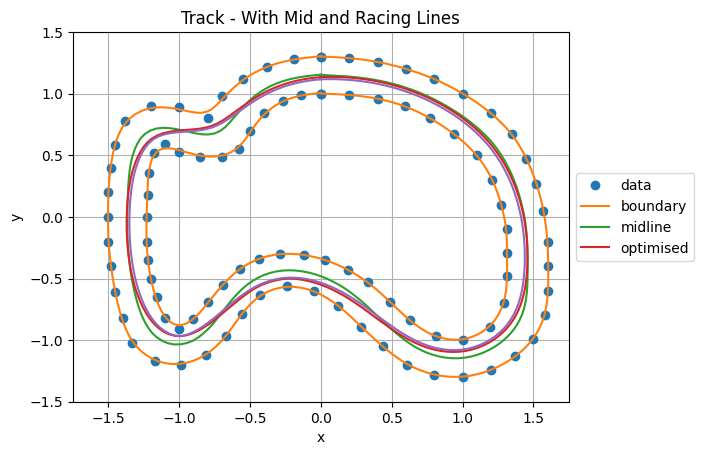

In [17]:
import sys
import os
sys.path.insert(1, "/Users/alistair/Projects/Dissertation/Jenson/src")
from Models.qes import QuickElasticSmoothing
from  Models.track import Track
from Models.robot import Robot
from Utils.state import State
from Utils.action import Action
from Utils.trajectory import Trajectory
import config

%load_ext autoreload
%autoreload 2

car = Robot()
path = os.path.join(config.SRC_PATH, "JSON/track.json")
track = Track.from_json(path, car)


In [18]:
midline = track.midline

racing_line = track.optimise(True)

midline_len = midline.length
racing_line_len = racing_line.length
no_norm_line = track.optimise(False)
no_norm_len = no_norm_line.length

print(midline_len)
print(no_norm_len)
print(racing_line_len)

midline_traj = track.profile(midline, car)[1]
racing_line_traj = track.profile(racing_line, car)[1]
no_norm_traj = track.profile(no_norm_line, car)[1]



optimisation commencing
path optimised
optimisation commencing
path optimised
9.221848842974564
8.66264838534711
8.756686038906121
profiling commencing
[1.00000000e+03 1.25711848e+00 3.54233794e+01 2.73944334e+00
 2.21309870e+00 1.97358535e+00 1.76345515e+00 1.58708058e+00
 1.47464672e+00 1.44121793e+00 1.44765090e+00 1.47096500e+00
 1.47354592e+00 1.42528785e+00 1.35336329e+00 1.24649803e+00
 1.14778226e+00 1.60502516e+00 1.55451168e+00 1.53790279e+00
 1.58245008e+00 1.61085174e+00 1.58913060e+00 1.52744013e+00
 1.45359697e+00 1.36006661e+00 1.26167093e+00 1.17025411e+00
 1.06790446e+00 9.00001448e-01 7.41740369e-01 1.15730572e+00
 1.07432004e+00 1.09857936e+00 1.19602795e+00 1.27594898e+00
 1.34438771e+00 1.51284116e+00 1.77364841e+00 1.49600288e+00
 1.78690334e+00 1.95626193e+00 1.91616081e+00 1.81989408e+00
 1.73162352e+00 1.66636962e+00 1.69063592e+00 1.88494473e+00
 2.27053300e+00 3.05133941e+00 4.86293148e+00 8.20911051e+00
 8.54247764e+00 4.14048168e+00 2.66254702e+00 6.5008008

In [19]:
_, mid_radii = midline.calc_curvature()
_, racing_radii = racing_line.calc_curvature()
_, no_norm_radii = no_norm_line.calc_curvature()


# remove outliers
mid_radii = [r for r in mid_radii if r < 1000 and r > 0]
racing_radii = [r for r in racing_radii if r < 1000 and r > 0]
no_norm_radii = [r for r in no_norm_radii if r < 1000 and r > 0]

avg_mid = sum(mid_radii) / len(mid_radii)
avg_racing = sum(racing_radii) / len(racing_radii)
avg_no_norm = sum(no_norm_radii) / len(no_norm_radii)

print(avg_mid)
print(avg_racing)
print(avg_no_norm)

from Models.input_profile import Profiler

mid_profiler = Profiler(midline, car)
racing_profiler = Profiler(racing_line, car)
no_norm_profiler = Profiler(no_norm_line, car)

mid_profiler.profile()
racing_profiler.profile()
no_norm_profiler.profile()

mid_time = 0
racing_time = 0
no_norm_time = 0

mid_quick_time = 0
racing_quick_time = 0
no_norm_quick_time = 0

mid_velocity = 0
racing_velocity = 0
no_norm_velocity = 0

mid_max_velocity = 0


for i in range(1, 200):
    mid_time += ((midline.t[i] - midline.t[i-1]) * midline_len) / mid_profiler.velocity[i]
    racing_time += ((racing_line.t[i] - racing_line.t[i-1]) * racing_line_len) / racing_profiler.velocity[i]
    no_norm_time += ((no_norm_line.t[i] - no_norm_line.t[i-1]) * no_norm_len) / no_norm_profiler.velocity[i]

    mid_velocity += mid_profiler.velocity[i]
    racing_velocity += racing_profiler.velocity[i]
    no_norm_velocity += no_norm_profiler.velocity[i]

    mid_quick_time += ((midline.t[i] - midline.t[i-1]) * midline_len) / mid_profiler.max_velocity[i]
    racing_quick_time += ((racing_line.t[i] - racing_line.t[i-1]) * racing_line_len) / racing_profiler.max_velocity[i]
    no_norm_quick_time += ((no_norm_line.t[i] - no_norm_line.t[i-1]) * no_norm_len) / no_norm_profiler.max_velocity[i]

    mid_max_velocity += mid_profiler.max_velocity[i]


mid_velocity /= 199
racing_velocity /= 199
no_norm_velocity /= 199

print(mid_velocity)
print(racing_velocity)
print(no_norm_velocity)

print(mid_time)
print(racing_time)
print(no_norm_time)

print(mid_quick_time)
print(racing_quick_time)
print(no_norm_quick_time)

import numpy as np


print(np.vstack((racing_profiler.velocity, racing_profiler.max_velocity, no_norm_profiler.velocity, no_norm_profiler.max_velocity)).T)



2.157742932379575
3.6263502888782346
1.7807098178116154
[1.00000000e+03 1.25711848e+00 3.54233794e+01 2.73944334e+00
 2.21309870e+00 1.97358535e+00 1.76345515e+00 1.58708058e+00
 1.47464672e+00 1.44121793e+00 1.44765090e+00 1.47096500e+00
 1.47354592e+00 1.42528785e+00 1.35336329e+00 1.24649803e+00
 1.14778226e+00 1.60502516e+00 1.55451168e+00 1.53790279e+00
 1.58245008e+00 1.61085174e+00 1.58913060e+00 1.52744013e+00
 1.45359697e+00 1.36006661e+00 1.26167093e+00 1.17025411e+00
 1.06790446e+00 9.00001448e-01 7.41740369e-01 1.15730572e+00
 1.07432004e+00 1.09857936e+00 1.19602795e+00 1.27594898e+00
 1.34438771e+00 1.51284116e+00 1.77364841e+00 1.49600288e+00
 1.78690334e+00 1.95626193e+00 1.91616081e+00 1.81989408e+00
 1.73162352e+00 1.66636962e+00 1.69063592e+00 1.88494473e+00
 2.27053300e+00 3.05133941e+00 4.86293148e+00 8.20911051e+00
 8.54247764e+00 4.14048168e+00 2.66254702e+00 6.50080083e+00
 2.11990312e+00 1.14297367e+00 9.68703061e-01 8.55099696e-01
 6.85910496e-01 5.43612923e-0